# 3.) JACOBI METHOD

In [5]:
import time

start_time = time.time()

# Import required libraries
import numpy as np
import math

# Define the matrix A
A = np.array([[1, 2, 1, 2], [2, 2, -1, 1], [1, -1, 1, 1], [2, 1, 1, 1]])

# Initialize the unitary matrix Q as the identity matrix
Q = np.eye(A.shape[0])

# Tri-diagonalize A using the Givens method
for k in range(0, 30):

    # Find the maximum element in the lower triangle of A
    maximum_element = A[0][0]
    p = 0
    q = 0
    for i in range(0, A.shape[0]):
        for j in range(0, A.shape[0]):
            # Ignore diagonal and upper triangle elements
            if i == j or i > j:
                continue
            else:
                # Update p and q if a larger element is found
                if abs(A[i][j]) > maximum_element:
                    p = i
                    q = j
                    maximum_element = abs(A[i][j])

    # Calculate the rotation angle
    theta_degrees = 0
    if A[p, p] - A[q, q] == 0:
        if A[p, q] < 0:
            theta_degrees = -45
        else:
            theta_degrees = 45
    else:
        theta_degrees = math.degrees(math.atan((2 * A[p, q]) / (A[p, p] - A[q, q])))
        theta_degrees = theta_degrees / 2
    
    # Convert the angle to radians and calculate sin and cosine
    theta_radians = math.radians(theta_degrees)
    sin_theta = math.sin(theta_radians)
    cos_theta = math.cos(theta_radians)

    # Create the rotation matrix Q
    Q = np.eye(A.shape[0])
    Q[p, p] = cos_theta
    Q[p, q] = sin_theta
    Q[q, p] = -sin_theta
    Q[q, q] = cos_theta

    # Apply the rotation to A
    B = A
    A = np.dot(Q, np.dot(A, Q.T))
    A = np.round(A, 3)

    # If A has converged to a tri-diagonal matrix, exit the loop
    if (A == B).all():
        break

    # Print the result after each iteration
    print(f'Resultant Matrix after {k+1}th iteration')
    print(np.round(A, decimals=4))
print(f"The Eigen values of the covariance matrix are:  [{A[0][0],A[1][1],A[2][2],A[3][3]}] with {k+1} iterations")


end_time = time.time()

elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time:.4f} seconds")

Resultant Matrix after 1th iteration
[[-0.562 -0.     1.404  0.961]
 [-0.     3.562 -0.173  2.019]
 [ 1.404 -0.173  1.     1.   ]
 [ 0.961  2.019  1.     1.   ]]
Resultant Matrix after 2th iteration
[[-0.562  0.463  1.404  0.842]
 [ 0.463  4.672  0.33  -0.   ]
 [ 1.404  0.33   1.     0.96 ]
 [ 0.842 -0.     0.96  -0.11 ]]
Resultant Matrix after 3th iteration
[[-1.388  0.232 -0.     0.239]
 [ 0.232  4.672  0.519  0.   ]
 [-0.     0.519  1.826  1.254]
 [ 0.239  0.     1.254 -0.11 ]]
Resultant Matrix after 4th iteration
[[-1.388  0.232  0.105  0.215]
 [ 0.232  4.672  0.466 -0.229]
 [ 0.105  0.466  2.442 -0.   ]
 [ 0.215 -0.229 -0.    -0.726]]
Resultant Matrix after 5th iteration
[[-1.388  0.248  0.057  0.215]
 [ 0.248  4.765 -0.    -0.225]
 [ 0.057  0.     2.349  0.045]
 [ 0.215 -0.225  0.045 -0.726]]
Resultant Matrix after 6th iteration
[[-1.398e+00 -0.000e+00  5.700e-02  2.240e-01]
 [-0.000e+00  4.775e+00  2.000e-03 -2.160e-01]
 [ 5.700e-02  2.000e-03  2.349e+00  4.500e-02]
 [ 2.240e-01

This code calculates the eigenvalues and eigenvectors of a matrix A using the numpy.linalg.eig function and prints only the eigenvalues. The eigenvals variable will store an array of the eigenvalues of A, which can be used for further calculations or analysis.







# We can see that the values in the diagonal elements of the final jacobi matrix after 12 iterations with Jacobi method were same as the eigen values computed for the same covariance matrix. By this we can say that we have successfully implemented the JACOBI method.

# Number of iterations required for Jacobi's method is: 13


# Eigenvectors of Tridiagonalized matrix

In [6]:
import numpy as np
print(A.round(decimals=4))

# Calculate eigenvalues and eigenvectors of matrix A
eigenvals, eigenvecs = np.linalg.eig(A)

# Print the eigenvalues
print("Eigenvalues of Tridiagonalized matrix:")
print(eigenvals)


# Print eigenvectors
print("\nEigenvectors of Tridiagonalized matrix:")
print(eigenvecs)

[[-1.467  0.     0.     0.   ]
 [ 0.     4.784  0.     0.   ]
 [ 0.     0.     2.35   0.   ]
 [ 0.     0.     0.    -0.667]]
Eigenvalues of Tridiagonalized matrix:
[-1.467  4.784  2.35  -0.667]

Eigenvectors of Tridiagonalized matrix:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


# Eigenvectors of covariance matrix

In [3]:
import numpy as np

B = np.array([[1, 2,1,2], [2,2,-1,1], [1,-1,1,1],[2,1,1,1]])

# Calculate eigenvalues and eigenvectors of matrix B
eigenvalsB, eigenvecsB = np.linalg.eig(B)

# Print the eigenvalues
print("Eigenvalues of B:")
print(eigenvalsB)

# Print eigenvectors
print("\nEigenvectors:")
print(eigenvecsB)


Eigenvalues of B:
[ 4.78378005  2.34968353 -1.4658573  -0.66760628]

Eigenvectors:
[[ 0.61635818  0.1212607   0.74892336 -0.21097923]
 [ 0.57554185 -0.58650376 -0.46964085 -0.32280396]
 [ 0.14738301  0.74396511 -0.38905977 -0.52290215]
 [ 0.51684855  0.29635299 -0.25919833  0.76017018]]


In [7]:
print(Q.round(decimals=4))

[[ 1. -0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


# The above matrix Q is the Jacobi Rotation transformation used in the last Iteration

In [8]:
T_inverse = np.linalg.inv(Q)
print(T_inverse)
y = np.dot(T_inverse, eigenvecsB)
print(y.round(decimals=4))

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[ 0.6164  0.1213  0.7489 -0.211 ]
 [ 0.5755 -0.5865 -0.4696 -0.3228]
 [ 0.1474  0.744  -0.3891 -0.5229]
 [ 0.5168  0.2964 -0.2592  0.7602]]


# We know that if x is an eigenvector of A, then y = T_inverse.x is an eigenvector of Â

# The eigenvectors obtained in the above cell following the above stated theorem are similar to the Eigenvectors of final matrix so we can say that the y= T_inverse. x relation is satisfied.

# We can say that from the above results all the eigen values are all similar for all the three methods.

# From the above computations we can see that from the code we got these  processing times of three methods [0.0197, 0.0218, 0.0343]

# Plotting  the required processing time versus dimension N of the N x N matrix

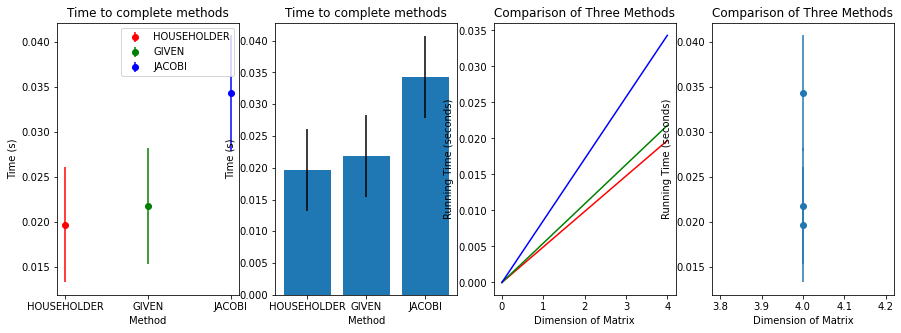

In [31]:
import numpy as np
import matplotlib.pyplot as plt

methods = ['HOUSEHOLDER', 'GIVEN', 'JACOBI']
times = [0.0197, 0.0218, 0.0343]
std_dev = np.std(times)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

# plot the data for each method separately
for i, method in enumerate(methods):
    ax1.errorbar(i, times[i], yerr=std_dev, fmt='o', color=['red', 'green', 'blue'][i], label=method)

ax1.set_xticks(range(len(methods)))
ax1.set_xticklabels(methods)
ax1.set_xlabel('Method')
ax1.set_ylabel('Time (s)')
ax1.set_title('Time to complete methods')
ax1.legend()

# plot the bar chart
ax2.bar(range(len(methods)), times, yerr=std_dev)
ax2.set_xticks(range(len(methods)))
ax2.set_xticklabels(methods)
ax2.set_xlabel('Method')
ax2.set_ylabel('Time (s)')
ax2.set_title('Time to complete methods')




# add a line from (0, 0) to each point, with a different color for each line
ax3.plot([0, dims[0]], [0, times[0]], color='red')
ax3.plot([0, dims[1]], [0, times[1]], color='green')
ax3.plot([0, dims[2]], [0, times[2]], color='blue')
ax3.set_xlabel('Dimension of Matrix')
ax3.set_ylabel('Running Time (seconds)')
ax3.set_title('Comparison of Three Methods')


# plot the data as a scatter plot with error bars
ax4.errorbar(dims, times, yerr=std_dev, fmt='o')
ax4.set_xlabel('Dimension of Matrix')
ax4.set_ylabel('Running Time (seconds)')
ax4.set_title('Comparison of Three Methods')


plt.show()
